![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/collab/Classifiers/NLU_E2E_Classification_Example.ipynb)
# E2E Classification with NLU 

# 1. Install Java and NLU

In [1]:
import os
! apt-get update -qq > /dev/null   
# Install java
! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
! pip install nlu > /dev/null    

# 2. Download E2E model and predict classes for sample string

In [2]:
import nlu
e2e_pipe  = nlu.load('e2e')
e2e_pipe.predict('E2E is a dataset for training generative models')

multiclassifierdl_use_e2e download started this may take some time.
Approximate size to download 11.7 MB
[OK!]
tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]


,e2e,e2e_confidence,sentence,sentence_embeddings
origin_index,,,,
0,customer rating[high],0.703248,E2E is a dataset for training generative models,"[0.021445205435156822, -0.039284929633140564, ..."
0,name[The Waterman],0.703248,None,None
0,eatType[restaurant],0.703248,None,None
0,priceRange[£20-25],0.703248,None,None
0,familyFriendly[no],0.703248,None,None
0,familyFriendly[yes],0.703248,None,None


# 3. Download Dataset

In [3]:
! wget -N https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/sarcasm/train-balanced-sarcasm.csv -P /tmp
import pandas as pd
df = pd.read_csv('/tmp/train-balanced-sarcasm.csv')


--2020-11-09 08:27:31--  https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/sarcasm/train-balanced-sarcasm.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.88.254
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.88.254|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255268960 (243M) [text/csv]
Saving to: ‘/tmp/train-balanced-sarcasm.csv’

train-balanced-sarc 100%[===================>] 243.44M  42.2MB/s    in 6.1s    

2020-11-09 08:27:38 (39.6 MB/s) - ‘/tmp/train-balanced-sarcasm.csv’ saved [255268960/255268960]



# 4. Predict on pandas dataset and visualize predictions


In [4]:
e2e_pipe  = nlu.load('e2e')
df['text'] = df['comment']
e2e_predictions = e2e_pipe.predict(df['text'].iloc[0:1000], output_level='sentence')
e2e_predictions

multiclassifierdl_use_e2e download started this may take some time.
Approximate size to download 11.7 MB
[OK!]
tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
INFO: NLU will assume text as label column since default text column could not be find


,e2e,e2e_confidence,sentence,sentence_embeddings
origin_index,,,,
0,eatType[restaurant],0.859201,NC and NH.,"[-0.06570463627576828, -0.03522053360939026, -..."
0,priceRange[moderate],0.859201,None,None
0,food[English],0.859201,None,None
1,name[Wildwood],0.829274,You do know west teams play against west teams...,"[-0.0254225991666317, 0.05448468029499054, -0...."
1,near[Ranch],0.829274,None,None
...,...,...,...,...
998,area[riverside],0.902405,None,None
998,familyFriendly[no],0.902405,None,None
998,familyFriendly[yes],0.902405,None,None


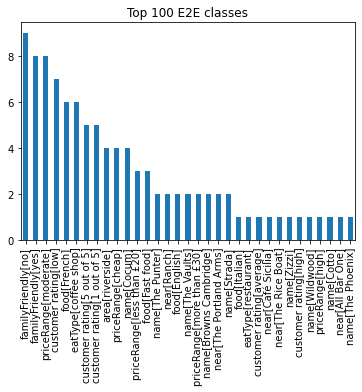

In [5]:
e2e_predictions.explode('e2e').e2e.iloc[0:100].value_counts().plot.bar(title='Top 100 E2E classes')